This notebook is about the about the different institutions in Haiti i.e technical training, 

In [382]:
from bs4 import BeautifulSoup
from selenium import webdriver
import requests
import csv
import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [339]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
pages = 16
for page in range(0,pages):
    url =f'https://www.jobpaw.com/pont/ecole.php?pageNum_RS_etablissementtout={page}&totalRows_RS_etablissementtout=315&id=2'
    print(url)

https://www.jobpaw.com/pont/ecole.php?pageNum_RS_etablissementtout=0&totalRows_RS_etablissementtout=315&id=2
https://www.jobpaw.com/pont/ecole.php?pageNum_RS_etablissementtout=1&totalRows_RS_etablissementtout=315&id=2
https://www.jobpaw.com/pont/ecole.php?pageNum_RS_etablissementtout=2&totalRows_RS_etablissementtout=315&id=2
https://www.jobpaw.com/pont/ecole.php?pageNum_RS_etablissementtout=3&totalRows_RS_etablissementtout=315&id=2
https://www.jobpaw.com/pont/ecole.php?pageNum_RS_etablissementtout=4&totalRows_RS_etablissementtout=315&id=2
https://www.jobpaw.com/pont/ecole.php?pageNum_RS_etablissementtout=5&totalRows_RS_etablissementtout=315&id=2
https://www.jobpaw.com/pont/ecole.php?pageNum_RS_etablissementtout=6&totalRows_RS_etablissementtout=315&id=2
https://www.jobpaw.com/pont/ecole.php?pageNum_RS_etablissementtout=7&totalRows_RS_etablissementtout=315&id=2
https://www.jobpaw.com/pont/ecole.php?pageNum_RS_etablissementtout=8&totalRows_RS_etablissementtout=315&id=2
https://www.jobpaw.

In [3]:
browser = webdriver.Chrome()
browser.get(url)

In [4]:
ids,institutions,type_formations,telephones,adresses = [],[],[],[],[]

In [5]:
ids,institutions,type_formations,telephones,adresses = [],[],[],[],[]
pages = 16
for page in range(0,pages):
    url =f'https://www.jobpaw.com/pont/ecole.php?pageNum_RS_etablissementtout={page}&totalRows_RS_etablissementtout=315&id=2'
    print(url)
    browser.get(url)
    soup = BeautifulSoup(browser.page_source ,'html5')
    tables = soup.find_all('table',class_='table table-hover table-bordered')
    tbody = tables[0].find_all('tbody')
    trs = tbody[0].find_all('tr')
    for tr in trs:
        tds = tr.find_all('td')
        if len(tds) == 4:
            print(tds[0].get_text().strip())
            a = tds[0].find('a')
            id_ =  a.get('href').split('?idf=')[-1]
            ids.append(id_)
            name =  tds[0].get_text().strip()
            formation =  tds[1].get_text().strip()
            tel =  tds[2].get_text().strip()
            adresse =  tds[3].get_text().strip()
            institutions.append(name)
            type_formations.append(formation)
            telephones.append(tel)
            adresses.append(adresse)

table1 = pd.DataFrame(dict(id_=ids,institutions=institutions,type_formations=type_formations,telephones=telephones,adresses=adresses))    

https://www.jobpaw.com/pont/ecole.php?pageNum_RS_etablissementtout=0&totalRows_RS_etablissementtout=315&id=2
Abeille Ecole Ménagère
Académie de Formation et de Perfectionnement des Cadres (Continue)
Académie des Sciences Pures et Appliquées
Académie Haïtienne des Arts Culinaires
Académie Nationale Diplomatique et Consulaire
Aiguille Enchantée
Alliance Centre de Form. Profes. et Technique (ACFPT)
America English School & Espana
Apex Centre de Formation Professionnelle
Atelier Ecole Professionnelle d'Ennery (AEPE)
Atelier Ecole Professionnelle La Gonâve
Ateliers de Petit Goave (Public)
Business and Technology Institute
Business Institute of the West Indies
Canado  Technique ou Centre de Formation Professionnelle d’Haiti (CFPH)
Cargo Freight International School
CASM (Public)
Centre Cardinal Keeler
Centre Catholique de Formation Professionnelle de Léogane
Centre d'Apprentissage de St Martin
https://www.jobpaw.com/pont/ecole.php?pageNum_RS_etablissementtout=1&totalRows_RS_etablissementtout

Faculté d'Ethnologie (UEH)
Faculté de Droit et des Sciences Economiques (UEH)
Faculté de Linguistique Appliquée (UEH)
Faculté de Médecine, de Pharmacie et Technologie Médicale (UEH)
Faculté des Sciences (UEH)
Faculté des Sciences Appliquées
Faculté des Sciences Humaines (UEH)
Faculté des Sciences Infirmières de l'Université Anténor Firmin
Faculté d’Odontologie (UEH)
Femme 2000
Femme Actuelle 2000
Gamma Training Centre de Formation Entrepreneuriale (Continue)
Global Technology School
Grand Anse 2000
Grand Séminaire Notre-Dame
Haïti Paramédical Center
Haiti Technique Informatisée
Help School of Nursing
Infoworld University
INPROJUBEL
https://www.jobpaw.com/pont/ecole.php?pageNum_RS_etablissementtout=10&totalRows_RS_etablissementtout=315&id=2
Insitut Supérieur des Sciences Infirmières et Techniques Jenner
Institut Adventiste Franco Haïtien
Institut d'Art et de Haute Couture Moderne
Institut d'Enseignement Chrétien Siloe (Cayes)
Institut d'Enseignement Chrétien Siloé de Port-au-Prince
Inst

In [6]:
table1.head()

,id_,institutions,type_formations,telephones,adresses
0,4,Abeille Ecole Ménagère,Technique,2257 7260,"Rue C. Mayard # 207, Pétion-Ville, Port-au-Pri..."
1,221,Académie de Formation et de Perfectionnement d...,Universitaire,"3617 8941, 4467 7790, 2227 6837, 4075 1060","12, rue Pacot (entre bellevue et la rue 4) Por..."
2,77,Académie des Sciences Pures et Appliquées,Universitaire & Technique,"3779 8259, 3925 1735","154, Lalue (ancien local du Collège Latin), Po..."
3,276,Académie Haïtienne des Arts Culinaires,Technique,"3808 2818, 3701 3469, 2811 0629, 3824 1789","Angle rue Duncombre et Ave Lamartiniere, Bois-..."
4,56,Académie Nationale Diplomatique et Consulaire,Universitaire,"2227 5543, 44743636","25 Ave N, Port-au-Prince, Ouest"


In [7]:
table1.to_csv('table1.csv')

In [96]:
table2=pd.DataFrame(None ,columns=['Spécialité','Domaine','Durée (année)', 'Type Diplôme','Diplômés','id_'])
for id_ in table1.id_: 
    url =f'https://www.jobpaw.com/pont/ecole.php?idf={id_}'
    print(url)
    r =pd.read_html(url)
    if len(r)>5:
        df2 =r[5]
        df2.columns = list(df2.iloc[0,:])
        df2.drop(index=0,inplace=True)
        df2['id_'] =id_
        table2 =pd.concat([table2,df2],sort=False)

https://www.jobpaw.com/pont/ecole.php?idf=4
https://www.jobpaw.com/pont/ecole.php?idf=221
https://www.jobpaw.com/pont/ecole.php?idf=77
https://www.jobpaw.com/pont/ecole.php?idf=276
https://www.jobpaw.com/pont/ecole.php?idf=56
https://www.jobpaw.com/pont/ecole.php?idf=5
https://www.jobpaw.com/pont/ecole.php?idf=174
https://www.jobpaw.com/pont/ecole.php?idf=340
https://www.jobpaw.com/pont/ecole.php?idf=6
https://www.jobpaw.com/pont/ecole.php?idf=175
https://www.jobpaw.com/pont/ecole.php?idf=7
https://www.jobpaw.com/pont/ecole.php?idf=8
https://www.jobpaw.com/pont/ecole.php?idf=319
https://www.jobpaw.com/pont/ecole.php?idf=10
https://www.jobpaw.com/pont/ecole.php?idf=224
https://www.jobpaw.com/pont/ecole.php?idf=23
https://www.jobpaw.com/pont/ecole.php?idf=24
https://www.jobpaw.com/pont/ecole.php?idf=320
https://www.jobpaw.com/pont/ecole.php?idf=285
https://www.jobpaw.com/pont/ecole.php?idf=268
https://www.jobpaw.com/pont/ecole.php?idf=176
https://www.jobpaw.com/pont/ecole.php?idf=248
htt

https://www.jobpaw.com/pont/ecole.php?idf=16
https://www.jobpaw.com/pont/ecole.php?idf=12
https://www.jobpaw.com/pont/ecole.php?idf=13
https://www.jobpaw.com/pont/ecole.php?idf=14
https://www.jobpaw.com/pont/ecole.php?idf=11
https://www.jobpaw.com/pont/ecole.php?idf=64
https://www.jobpaw.com/pont/ecole.php?idf=17
https://www.jobpaw.com/pont/ecole.php?idf=362
https://www.jobpaw.com/pont/ecole.php?idf=15
https://www.jobpaw.com/pont/ecole.php?idf=202
https://www.jobpaw.com/pont/ecole.php?idf=150
https://www.jobpaw.com/pont/ecole.php?idf=290
https://www.jobpaw.com/pont/ecole.php?idf=299
https://www.jobpaw.com/pont/ecole.php?idf=147
https://www.jobpaw.com/pont/ecole.php?idf=83
https://www.jobpaw.com/pont/ecole.php?idf=351
https://www.jobpaw.com/pont/ecole.php?idf=377
https://www.jobpaw.com/pont/ecole.php?idf=263
https://www.jobpaw.com/pont/ecole.php?idf=369
https://www.jobpaw.com/pont/ecole.php?idf=203
https://www.jobpaw.com/pont/ecole.php?idf=356
https://www.jobpaw.com/pont/ecole.php?idf=1

In [97]:
table2.head()

,Spécialité,Domaine,Durée (année),Type Diplôme,Diplômés,id_
1,Coupe - Confect.Féminine,"Arts, Culture, Design et mode",2,Technique,5,4
2,Cuisine,"Tourisme, Hôtellerie et Restauration",2,Technique,10,4
3,Patisserie,"Tourisme, Hôtellerie et Restauration",2,Technique,20,4
1,Architecture,"Architecture, Urbanisme et Aménagement du terr...",4,Licence,35,77
2,Comptabilité,"Management/Gestion, Finance, Comptabilité et C...",4,Licence,40,77


In [10]:
table2.to_csv('df_final.csv')

In [98]:
table1['id_'] = table1['id_'].astype(int)

In [99]:
table2['id_'] = table2['id_'].astype(int)

In [105]:
table2.rename(columns = {'Spécialité':'Specialites','Domaine':'Domaines','Durée (année)':'Durees','Type Diplôme':'Type_Diplomes','Diplômés':'Diplomes'}, inplace = True) 

In [106]:
table2.head()

,Specialites,Domaines,Durees,Type_Diplomes,Diplomes,id_
1,Coupe - Confect.Féminine,"Arts, Culture, Design et mode",2,Technique,5,4
2,Cuisine,"Tourisme, Hôtellerie et Restauration",2,Technique,10,4
3,Patisserie,"Tourisme, Hôtellerie et Restauration",2,Technique,20,4
1,Architecture,"Architecture, Urbanisme et Aménagement du terr...",4,Licence,35,77
2,Comptabilité,"Management/Gestion, Finance, Comptabilité et C...",4,Licence,40,77


In [24]:
table2_1 = pd.get_dummies(table2[['id_','Spécialité','Domaine','Type Diplôme']],prefix=None)

In [25]:
table2_2 =table2_1.groupby(['id_']).sum()

In [26]:
table2_2.reset_index(inplace=True)

In [27]:
table2_2

,id_,Spécialité_- - Non-defini - -,Spécialité_Administration Scolaire,Spécialité_Administration judiciaire,Spécialité_Agronomie,Spécialité_Aménagement du territoire,Spécialité_Anglais,Spécialité_Anthropologie,Spécialité_Architecture,Spécialité_Art - Floral,...,Domaine_Sciences de l’Ingénieur,Domaine_Sciences économiques et politiques,Domaine_Secrétariat,"Domaine_Tourisme, Hôtellerie et Restauration",Domaine_Transport et Logistique,Type Diplôme_Certificat,Type Diplôme_Diplome,Type Diplôme_Licence,Type Diplôme_Master 1,Type Diplôme_Technique
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,3,0
1,2,0,0,0,1,0,0,0,0,0,...,4,2,1,2,0,0,12,15,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,3
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,377,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,4
270,384,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
271,397,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
272,398,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [218]:
df_final = pd.merge(table1,table2_2, on='id_',how='left', sort= True)

In [219]:
df_final.head()

,id_,institutions,type_formations,telephones,adresses,Spécialité_- - Non-defini - -,Spécialité_Administration Scolaire,Spécialité_Administration judiciaire,Spécialité_Agronomie,Spécialité_Aménagement du territoire,...,Domaine_Sciences de l’Ingénieur,Domaine_Sciences économiques et politiques,Domaine_Secrétariat,"Domaine_Tourisme, Hôtellerie et Restauration",Domaine_Transport et Logistique,Type Diplôme_Certificat,Type Diplôme_Diplome,Type Diplôme_Licence,Type Diplôme_Master 1,Type Diplôme_Technique
0,1,Ecole Supérieure d'Infotronique d'Haiti,Universitaire,"2226 4749, 3778 6922, 3615 287","2ème ruelle Nazon # 29, Bourdon, Port-au-Princ...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0
1,2,Université Américaine des Sciences Modernes d'...,Universitaire,"3358 0841, 3197 4762, 3811 1749, 3664 0716","16 Bis, Avenue Christophe, Rue 4 et Delmas 65 ...",0.0,0.0,0.0,1.0,0.0,...,4.0,2.0,1.0,2.0,0.0,0.0,12.0,15.0,0.0,0.0
2,3,Université de Port-au-Prince,Universitaire,"2813 0591, 2813 0589","19, Rue Rivière, Canapé-Vert, Port-au-Prince",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
3,4,Abeille Ecole Ménagère,Technique,2257 7260,"Rue C. Mayard # 207, Pétion-Ville, Port-au-Pri...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0
4,5,Aiguille Enchantée,Technique,34492029,"Cap-Haïtien, Nord",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
nan_rows = df_final[df_final.isnull().any(1)]

In [29]:
nan_rows

,id_,institutions,type_formations,telephones,adresses,Spécialité_- - Non-defini - -,Spécialité_Administration Scolaire,Spécialité_Administration judiciaire,Spécialité_Agronomie,Spécialité_Aménagement du territoire,...,Domaine_Sciences de l’Ingénieur,Domaine_Sciences économiques et politiques,Domaine_Secrétariat,"Domaine_Tourisme, Hôtellerie et Restauration",Domaine_Transport et Logistique,Type Diplôme_Certificat,Type Diplôme_Diplome,Type Diplôme_Licence,Type Diplôme_Master 1,Type Diplôme_Technique
4,5,Aiguille Enchantée,Technique,34492029,"Cap-Haïtien, Nord",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,46,Centre d'enseignement professionnel des Gonaives,Technique,3862 3279,"34, Descahos, Route Nationale #1, Gonaives, Ar...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,74,Ecole Supérieure Catholique de Droit de Jérémie,Universitaire,2284 6816,"Brouette, Jeremie, Grand-Anse",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,78,Université Métropole d'Haïti,Universitaire,3815 9518,"Fond des Nègres, Route Nationale #2, Sud \nAve...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,91,Centre Pratique de comptabilité D'informatique...,Technique,3876 62 58,Port-au-Prince,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,95,Centre Specialise de leadership CSL (Continue),Technique,3887-3386,Port-au-Prince,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,122,Mathilde V. Den Berghe,Technique,3748 7311,"2, Santo 25 Prolonge,Port-au-Prince, Ouest",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,153,Ero Professional Secretariat School (Continue),Technique,"2245 1793, 2245 4294","6, Route de Desprez Pacot, Port-au-Prince, Ouest",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,180,Centre de Formation Professionnelle Café-Lampr...,Technique,4224 3547,"Café Lompré, Port-au-Prince, Ouest",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,182,Centre de Formation Professionnelle et Tech.,Technique,3693 5364,"Cap Haitien, Nord",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
ids,Specialites,Domaines,Durees,Type_Diplomes,Diplomes = [],[],[],[],[],[]

for id_ in nan_rows.id_: 
    url =f'https://www.jobpaw.com/pont/ecole.php?idf={id_}'
    browser.get(url)
    soup = BeautifulSoup(browser.page_source ,'html5')
    try :
        tables = soup.find_all('table',class_='table table-hover table-bordered')
        tbody = tables[0].find_all('tbody')
        trs = tbody[0].find_all('tr') 
        for tr in trs:
            tds = tr.find_all('td')
            print(id_)
            ids.append(id_)
            Specialites.append(tds[0].get_text().strip())
            Domaines.append(tds[1].get_text().strip()) 
            Durees.append( tds[2].get_text().strip())
            Type_Diplomes.append(tds[3].get_text().strip())
            Diplomes.append(tds[4].get_text().strip())
    except:
        pass
table3=DataFrame(dict(id_=ids,Specialites=Specialites,Domaines=Domaines,Durees=Durees,Type_Diplomes=Type_Diplomes,Diplomes=Diplomes))            

5
5
5
5
46
46
46
46
46
74
74
78
78
78
78
78
78
91
91
91
91
91
91
122
122
122
122
122
180
180
180
180
190
190
190
190
190
190
190
190
195
195
203
203
203
203
203
203
206
206
206
206
208
208
208
208
214
214
266
266
266
266
266
285
285
285
285
285
285
285
289
289
304
304
305
305
305
305
305
305
305
310
310
310
310
314
314
314
314
314
319
319
319
319
320
320
322
322
322
336
336
336
336
336
337
337
337
338
338
338
340
340
340
376
376
376
376
376
392
392
396
396
396
396
396
396
396
402
402
402
402
402
402


NameError: name 'DataFrame' is not defined

In [73]:
table3=pd.DataFrame(dict(id_=ids,Specialites=Specialites,Domaines=Domaines,Durees=Durees,Type_Diplomes=Type_Diplomes,Diplomes=Diplomes))            

In [78]:
table3.id_.nunique()

31

In [107]:
table4 = pd.concat ([table2,table3],sort=False)

In [108]:
table4

,Specialites,Domaines,Durees,Type_Diplomes,Diplomes,id_
1,Coupe - Confect.Féminine,"Arts, Culture, Design et mode",2,Technique,5,4
2,Cuisine,"Tourisme, Hôtellerie et Restauration",2,Technique,10,4
3,Patisserie,"Tourisme, Hôtellerie et Restauration",2,Technique,20,4
1,Architecture,"Architecture, Urbanisme et Aménagement du terr...",4,Licence,35,77
2,Comptabilité,"Management/Gestion, Finance, Comptabilité et C...",4,Licence,40,77
...,...,...,...,...,...,...
128,Communication,Communication et Journalisme,-,Technique,-,402
129,Mécanique Auto - Diesel,Mécanique,-,Technique,-,402
130,Construction Bâtiment,Métiers du bâtiment et autres,-,Technique,-,402
131,Charpenterie,Métiers du bâtiment et autres,-,Technique,-,402


In [111]:
table4['id_'] = table4['id_'].astype(int)

In [112]:
table4_1 = pd.get_dummies(table4[['id_','Specialites','Domaines','Type_Diplomes']],prefix=None)

In [113]:
table4_2 =table4_1.groupby(['id_']).sum()

In [114]:
table4_2.reset_index(inplace=True)

In [115]:
table4_2

,id_,Specialites_- - Non-defini - -,Specialites_Administration Scolaire,Specialites_Administration judiciaire,Specialites_Agronomie,Specialites_Aménagement du territoire,Specialites_Anglais,Specialites_Anthropologie,Specialites_Architecture,Specialites_Art - Floral,...,Domaines_Sciences économiques et politiques,Domaines_Secrétariat,"Domaines_Tourisme, Hôtellerie et Restauration",Domaines_Transport et Logistique,Type_Diplomes_Certificat,Type_Diplomes_Diplome,Type_Diplomes_Licence,Type_Diplomes_Master 1,Type_Diplomes_Technique,Type_Diplomes_Type Diplôme
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,3,0,0
1,2,0,0,0,1,0,0,0,0,0,...,2,1,2,0,0,12,15,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,3,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,396,0,0,0,0,0,0,0,0,0,...,0,0,1,0,6,0,0,0,0,1
301,397,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
302,398,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
303,399,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0


In [220]:
df_final_1 = pd.merge(table1,table4_2, on='id_',how='left', sort= True)

In [221]:
df_final_1

,id_,institutions,type_formations,telephones,adresses,Specialites_- - Non-defini - -,Specialites_Administration Scolaire,Specialites_Administration judiciaire,Specialites_Agronomie,Specialites_Aménagement du territoire,...,Domaines_Sciences économiques et politiques,Domaines_Secrétariat,"Domaines_Tourisme, Hôtellerie et Restauration",Domaines_Transport et Logistique,Type_Diplomes_Certificat,Type_Diplomes_Diplome,Type_Diplomes_Licence,Type_Diplomes_Master 1,Type_Diplomes_Technique,Type_Diplomes_Type Diplôme
0,1,Ecole Supérieure d'Infotronique d'Haiti,Universitaire,"2226 4749, 3778 6922, 3615 287","2ème ruelle Nazon # 29, Bourdon, Port-au-Princ...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
1,2,Université Américaine des Sciences Modernes d'...,Universitaire,"3358 0841, 3197 4762, 3811 1749, 3664 0716","16 Bis, Avenue Christophe, Rue 4 et Delmas 65 ...",0.0,0.0,0.0,1.0,0.0,...,2.0,1.0,2.0,0.0,0.0,12.0,15.0,0.0,0.0,0.0
2,3,Université de Port-au-Prince,Universitaire,"2813 0591, 2813 0589","19, Rue Rivière, Canapé-Vert, Port-au-Prince",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
3,4,Abeille Ecole Ménagère,Technique,2257 7260,"Rue C. Mayard # 207, Pétion-Ville, Port-au-Pri...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,5,Aiguille Enchantée,Technique,34492029,"Cap-Haïtien, Nord",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,397,Université Publique du Sud-Est à Jacmel,Universitaire,509 3691-0116 / 509 4703-8783,"Route de Meyer, Jacmel, Haïti",0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
311,398,Université de Fondwa,Universitaire,509 4090 9090/ 509 2813 1926,"31 rue Chériez, Canapé-vert, Port-au-Prince, H...",0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
312,399,Université Anténor Firmin,Universitaire,(509) 3464-9408,"Entrée Kiteyo, Cité Chauvel, Cap-Haïtien, Haïti",0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
313,400,Université Publique de la Grand'Anse,Universitaire,509 3881 3225/,"Château, Jérémie, Grand'Anse",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
nan_rows1 = df_final_1[df_final_1.isnull().any(1)]

In [122]:
nan_rows1

,id_,institutions,type_formations,telephones,adresses,Specialites_- - Non-defini - -,Specialites_Administration Scolaire,Specialites_Administration judiciaire,Specialites_Agronomie,Specialites_Aménagement du territoire,...,Domaines_Sciences économiques et politiques,Domaines_Secrétariat,"Domaines_Tourisme, Hôtellerie et Restauration",Domaines_Transport et Logistique,Type_Diplomes_Certificat,Type_Diplomes_Diplome,Type_Diplomes_Licence,Type_Diplomes_Master 1,Type_Diplomes_Technique,Type_Diplomes_Type Diplôme
79,95,Centre Specialise de leadership CSL (Continue),Technique,3887-3386,Port-au-Prince,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,153,Ero Professional Secretariat School (Continue),Technique,"2245 1793, 2245 4294","6, Route de Desprez Pacot, Port-au-Prince, Ouest",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,182,Centre de Formation Professionnelle et Tech.,Technique,3693 5364,"Cap Haitien, Nord",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,221,Académie de Formation et de Perfectionnement d...,Universitaire,"3617 8941, 4467 7790, 2227 6837, 4075 1060","12, rue Pacot (entre bellevue et la rue 4) Por...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,273,Centre de Formation Continue (Continue),Technique,"4309 9271, 2813 1413",Port-au-Prince,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,283,TRANSVERSAL (Continue),Technique,3871 1662,"9, Avenue Lamartinière Bois Verna, Port-au-Pri...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,288,Centre d'Atelier Professionnel et de Formation...,Technique,"3460 3976, 3728 0532","#12, vIL.Espérance, Mirbalais, Centre",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,290,Gamma Training Centre de Formation Entrepreneu...,Technique,3751 9038,"514, Delmas 66, Port-au-Prince, Ouest",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,391,Institut de formation en gestion pour la Logis...,Technique,"2278 3635, 4038 3475, 3408 3561","Delmas 83, Port-au-Prince, Ouest",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,400,Université Publique de la Grand'Anse,Universitaire,509 3881 3225/,"Château, Jérémie, Grand'Anse",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
remove_nan = df_final_1[df_final_1['Specialites_Administration Scolaire'].isnull()].index

In [223]:
remove_nan

Int64Index([79, 117, 138, 167, 211, 220, 225, 227, 307, 313], dtype='int64')

In [224]:
df_final_1.drop(remove_nan, inplace = True)

In [225]:
df_final_1

,id_,institutions,type_formations,telephones,adresses,Specialites_- - Non-defini - -,Specialites_Administration Scolaire,Specialites_Administration judiciaire,Specialites_Agronomie,Specialites_Aménagement du territoire,...,Domaines_Sciences économiques et politiques,Domaines_Secrétariat,"Domaines_Tourisme, Hôtellerie et Restauration",Domaines_Transport et Logistique,Type_Diplomes_Certificat,Type_Diplomes_Diplome,Type_Diplomes_Licence,Type_Diplomes_Master 1,Type_Diplomes_Technique,Type_Diplomes_Type Diplôme
0,1,Ecole Supérieure d'Infotronique d'Haiti,Universitaire,"2226 4749, 3778 6922, 3615 287","2ème ruelle Nazon # 29, Bourdon, Port-au-Princ...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
1,2,Université Américaine des Sciences Modernes d'...,Universitaire,"3358 0841, 3197 4762, 3811 1749, 3664 0716","16 Bis, Avenue Christophe, Rue 4 et Delmas 65 ...",0.0,0.0,0.0,1.0,0.0,...,2.0,1.0,2.0,0.0,0.0,12.0,15.0,0.0,0.0,0.0
2,3,Université de Port-au-Prince,Universitaire,"2813 0591, 2813 0589","19, Rue Rivière, Canapé-Vert, Port-au-Prince",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
3,4,Abeille Ecole Ménagère,Technique,2257 7260,"Rue C. Mayard # 207, Pétion-Ville, Port-au-Pri...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,5,Aiguille Enchantée,Technique,34492029,"Cap-Haïtien, Nord",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,396,Centre de formation technique et professionnel...,Technique,509,"Cite Soleil, Ouest.",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0
310,397,Université Publique du Sud-Est à Jacmel,Universitaire,509 3691-0116 / 509 4703-8783,"Route de Meyer, Jacmel, Haïti",0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
311,398,Université de Fondwa,Universitaire,509 4090 9090/ 509 2813 1926,"31 rue Chériez, Canapé-vert, Port-au-Prince, H...",0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
312,399,Université Anténor Firmin,Universitaire,(509) 3464-9408,"Entrée Kiteyo, Cité Chauvel, Cap-Haïtien, Haïti",0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0


In [150]:
col_adr = df_final_1[['adresses']]

In [152]:
col_adr

,adresses
0,"2ème ruelle Nazon # 29, Bourdon, Port-au-Princ..."
1,"16 Bis, Avenue Christophe, Rue 4 et Delmas 65 ..."
2,"19, Rue Rivière, Canapé-Vert, Port-au-Prince"
3,"Rue C. Mayard # 207, Pétion-Ville, Port-au-Pri..."
4,"Cap-Haïtien, Nord"
...,...
309,"Cite Soleil, Ouest."
310,"Route de Meyer, Jacmel, Haïti"
311,"31 rue Chériez, Canapé-vert, Port-au-Prince, H..."
312,"Entrée Kiteyo, Cité Chauvel, Cap-Haïtien, Haïti"


In [158]:
adr = col_adr['adresses'].str.split(',', expand = True)

In [159]:
adr = tcheck_1.iloc[:,0:3]

In [173]:
adr.head(80)

,0,1,2
0,2ème ruelle Nazon # 29,Bourdon,Port-au-Prince
1,16 Bis,Avenue Christophe,Rue 4 et Delmas 65 rue Marcelin #4
2,19,Rue Rivière,Canapé-Vert
3,Rue C. Mayard # 207,Pétion-Ville,Port-au-Prince
4,Cap-Haïtien,Nord,None
...,...,...,...
75,Chancerelle - Varreux,Port-au-Prince,Ouest
76,Port-au-Prince,None,None
77,,None,None
78,Amiral Kilik# 18b,\nNord- Ouest,None


In [165]:
adr.to_csv('df_adr.csv',encoding="utf-8")

In [396]:
pd_adr = pd.read_csv("df_adr.csv")

In [397]:
pd_adr['institutions']= df_final_1.institutions

In [398]:
pd_adr.head()

,Unnamed: 0,0,1,2,institutions
0,0,2ème ruelle Nazon # 29,Port-au-Prince,Port-au-Prince,Abeille Ecole Ménagère
1,1,16 Bis,Port-au-Prince,Rue 4 et Delmas 65 rue Marcelin #4,Académie Haïtienne des Arts Culinaires
2,2,19,Port-au-Prince,Canapé-Vert,Académie Nationale Diplomatique et Consulaire
3,3,Rue C. Mayard # 207,Petion-Ville,Port-au-Prince,Académie des Sciences Pures et Appliquées
4,4,Cap-Haïtien,Cap-Haitien,NaN,Aiguille Enchantée


In [399]:
pd_adr.drop(['0', '2','Unnamed: 0'], axis=1, inplace=True)

In [400]:
pd_adr.head()

,1,institutions
0,Port-au-Prince,Abeille Ecole Ménagère
1,Port-au-Prince,Académie Haïtienne des Arts Culinaires
2,Port-au-Prince,Académie Nationale Diplomatique et Consulaire
3,Petion-Ville,Académie des Sciences Pures et Appliquées
4,Cap-Haitien,Aiguille Enchantée


In [401]:
pd_adr.rename(columns = {'1':'communes'},inplace=True)

In [402]:
 df_final_1 = pd.merge(df_final_1,pd_adr, on='institutions',how='left', sort= True)

In [603]:
 df_final_1.head() 

,id_,institutions,type_formations,telephones,adresses,Specialites_- - Non-defini - -,Specialites_Administration Scolaire,Specialites_Administration judiciaire,Specialites_Agronomie,Specialites_Aménagement du territoire,Specialites_Anglais,Specialites_Anthropologie,Specialites_Architecture,Specialites_Art - Floral,Specialites_Artisanat,Specialites_Arts du Spectacle,Specialites_Arts ménagers,Specialites_Arts plastiques,Specialites_Assistante Administrative,Specialites_Auxiliaire,Specialites_Beaux-Arts,Specialites_Biologie,Specialites_Broderie,Specialites_Carrelage,Specialites_Charpenterie,Specialites_Chimie,Specialites_Chirurgien-Dentiste,Specialites_Communication,Specialites_Comptabilité,Specialites_Construction Bâtiment,Specialites_Cordonnerie,Specialites_Cosmétologie,Specialites_Coupe - Confect. masculine,Specialites_Coupe - Confect.Féminine,Specialites_Coupe couture,Specialites_Criminologie,Specialites_Cuisine,Specialites_Dessin Industriel,Specialites_Diplomatie,Specialites_Droit,Specialites_Décoration et Architecture d’intérieur,Specialites_Dépannage d'ordinateurs,Specialites_Développement rural,Specialites_Ebenisterie,Specialites_Economie,Specialites_Economie rurale,Specialites_Education Familiale et Sexologie,Specialites_Electricité,Specialites_Electricité Auto,Specialites_Electronique/Autotronique,Specialites_Electrotechnique/Electromecanique,Specialites_Enseignement Technique,Specialites_Enseignement fondamental et secondaire,Specialites_Enseignement prescolaire et primaire,Specialites_Enseignement supérieur,Specialites_Entrepreneuriat,Specialites_Environnement,Specialites_Espagnol,Specialites_Etude des Eaux de Surface,Specialites_Etude des Eaux souterraines,Specialites_Ferronnerie Soudure,Specialites_Finance et Banque,Specialites_Français Langue étrangère (FLE),Specialites_Gestion Financière,Specialites_Gestion Touristique,Specialites_Gestion de PME,Specialites_Gestion de Projets,Specialites_Gestion des ONG,Specialites_Gestion des Ressources Humaines,Specialites_Gouvernance,Specialites_Génie Civil,Specialites_Génie Electrique,Specialites_Génie Electromécanique,Specialites_Génie Electronique,Specialites_Génie Industriel,Specialites_Génie Logiciel,Specialites_Génie Mécanique,Specialites_Génie Rural,Specialites_Géographie,Specialites_Géologie Appliquée,Specialites_Haute Couture,Specialites_Histoire,Specialites_Histoire de l'Art et Archéologie,Specialites_Hôtellerie,Specialites_Hôtesse de l'air,Specialites_Infographie,Specialites_Informatique de Gestion,Specialites_Ingénieur Agronome,Specialites_Injection à Essence,Specialites_Journalisme,Specialites_Langues vivantes,Specialites_Lettres,Specialites_Linguistique,Specialites_Logistique,Specialites_Management/Gestion,Specialites_Marketing,Specialites_Maths/Physique,Specialites_Mathématiques,Specialites_Matériaux de Construction,Specialites_Mecanique,Specialites_Menuiserie,Specialites_Musicologie,Specialites_Mécanique Ajustage,Specialites_Mécanique Auto - Diesel,Specialites_Mécanique Industrielle,Specialites_Mécanique automobile,Specialites_Mécanique des Roches,Specialites_Mécanique des Sols,Specialites_Médecine Générale,Specialites_Médecine communautaire,Specialites_Nutrition,Specialites_Patisserie,Specialites_Pharmacie,Specialites_Philosophie,Specialites_Photographie / Vidéographie,Specialites_Physique,Specialites_Planification,Specialites_Plomberie,Specialites_Poterie,Specialites_Production Agricole ou Phytotechnie,Specialites_Production Animale ou Zootechnie,Specialites_Production végétale,Specialites_Programmation,Specialites_Psychologie,Specialites_Pédagogie,Specialites_Recherche et Développement,Specialites_Relations Internationales,Specialites_Relations publiques,Specialites_Ressources Naturelles et Environnement,Specialites_Restauration,Specialites_Réalisateur et Concepteur Multimédia,Specialites_Réfrigération,Specialites_Réseau,Specialites_Réseau et Télécommunications,Specialites_Sciences Expérimentales,Specialites_Sciences Infirmières,Specialites_Sciences Informatiq

In [406]:
from geopy.geocoders import Nominatim
institutions,locations = [], []
for name,adr in zip(df_final_1.institutions,df_final_1.communes):
    geolocator = Nominatim(user_agent="location")
    location = geolocator.geocode(adr)
    if location:
        locations.append((location.latitude, location.longitude))
        institutions.append(name)

In [407]:
values =dict(institutions=institutions,locations=locations)

In [408]:
df_location = pd.DataFrame(values)

In [409]:
df_location.head()

,institutions,locations
0,Abeille Ecole Ménagère,"(18.547327, -72.3395928)"
1,Académie Haïtienne des Arts Culinaires,"(18.547327, -72.3395928)"
2,Académie Nationale Diplomatique et Consulaire,"(18.547327, -72.3395928)"
3,Académie des Sciences Pures et Appliquées,"(18.5132181, -72.2860209)"
4,Aiguille Enchantée,"(19.7595236, -72.2008068)"


In [410]:
 df_final_2 = pd.merge(df_final_1,df_location, on='institutions',how='left', sort= True)

In [411]:
 df_final_2.head()

,id_,institutions,type_formations,telephones,adresses,Specialites_- - Non-defini - -,Specialites_Administration Scolaire,Specialites_Administration judiciaire,Specialites_Agronomie,Specialites_Aménagement du territoire,Specialites_Anglais,Specialites_Anthropologie,Specialites_Architecture,Specialites_Art - Floral,Specialites_Artisanat,Specialites_Arts du Spectacle,Specialites_Arts ménagers,Specialites_Arts plastiques,Specialites_Assistante Administrative,Specialites_Auxiliaire,Specialites_Beaux-Arts,Specialites_Biologie,Specialites_Broderie,Specialites_Carrelage,Specialites_Charpenterie,Specialites_Chimie,Specialites_Chirurgien-Dentiste,Specialites_Communication,Specialites_Comptabilité,Specialites_Construction Bâtiment,Specialites_Cordonnerie,Specialites_Cosmétologie,Specialites_Coupe - Confect. masculine,Specialites_Coupe - Confect.Féminine,Specialites_Coupe couture,Specialites_Criminologie,Specialites_Cuisine,Specialites_Dessin Industriel,Specialites_Diplomatie,Specialites_Droit,Specialites_Décoration et Architecture d’intérieur,Specialites_Dépannage d'ordinateurs,Specialites_Développement rural,Specialites_Ebenisterie,Specialites_Economie,Specialites_Economie rurale,Specialites_Education Familiale et Sexologie,Specialites_Electricité,Specialites_Electricité Auto,Specialites_Electronique/Autotronique,Specialites_Electrotechnique/Electromecanique,Specialites_Enseignement Technique,Specialites_Enseignement fondamental et secondaire,Specialites_Enseignement prescolaire et primaire,Specialites_Enseignement supérieur,Specialites_Entrepreneuriat,Specialites_Environnement,Specialites_Espagnol,Specialites_Etude des Eaux de Surface,Specialites_Etude des Eaux souterraines,Specialites_Ferronnerie Soudure,Specialites_Finance et Banque,Specialites_Français Langue étrangère (FLE),Specialites_Gestion Financière,Specialites_Gestion Touristique,Specialites_Gestion de PME,Specialites_Gestion de Projets,Specialites_Gestion des ONG,Specialites_Gestion des Ressources Humaines,Specialites_Gouvernance,Specialites_Génie Civil,Specialites_Génie Electrique,Specialites_Génie Electromécanique,Specialites_Génie Electronique,Specialites_Génie Industriel,Specialites_Génie Logiciel,Specialites_Génie Mécanique,Specialites_Génie Rural,Specialites_Géographie,Specialites_Géologie Appliquée,Specialites_Haute Couture,Specialites_Histoire,Specialites_Histoire de l'Art et Archéologie,Specialites_Hôtellerie,Specialites_Hôtesse de l'air,Specialites_Infographie,Specialites_Informatique de Gestion,Specialites_Ingénieur Agronome,Specialites_Injection à Essence,Specialites_Journalisme,Specialites_Langues vivantes,Specialites_Lettres,Specialites_Linguistique,Specialites_Logistique,Specialites_Management/Gestion,Specialites_Marketing,Specialites_Maths/Physique,Specialites_Mathématiques,Specialites_Matériaux de Construction,Specialites_Mecanique,Specialites_Menuiserie,Specialites_Musicologie,Specialites_Mécanique Ajustage,Specialites_Mécanique Auto - Diesel,Specialites_Mécanique Industrielle,Specialites_Mécanique automobile,Specialites_Mécanique des Roches,Specialites_Mécanique des Sols,Specialites_Médecine Générale,Specialites_Médecine communautaire,Specialites_Nutrition,Specialites_Patisserie,Specialites_Pharmacie,Specialites_Philosophie,Specialites_Photographie / Vidéographie,Specialites_Physique,Specialites_Planification,Specialites_Plomberie,Specialites_Poterie,Specialites_Production Agricole ou Phytotechnie,Specialites_Production Animale ou Zootechnie,Specialites_Production végétale,Specialites_Programmation,Specialites_Psychologie,Specialites_Pédagogie,Specialites_Recherche et Développement,Specialites_Relations Internationales,Specialites_Relations publiques,Specialites_Ressources Naturelles et Environnement,Specialites_Restauration,Specialites_Réalisateur et Concepteur Multimédia,Specialites_Réfrigération,Specialites_Réseau,Specialites_Réseau et Télécommunications,Specialites_Sciences Expérimentales,Specialites_Sciences Infirmières,Specialites_Sciences Informatiq

In [412]:
table5= df_final_2[['id_','institutions','communes','locations']]

In [413]:
table5

,id_,institutions,communes,locations
0,4,Abeille Ecole Ménagère,Port-au-Prince,"(18.547327, -72.3395928)"
1,276,Académie Haïtienne des Arts Culinaires,Port-au-Prince,"(18.547327, -72.3395928)"
2,56,Académie Nationale Diplomatique et Consulaire,Port-au-Prince,"(18.547327, -72.3395928)"
3,77,Académie des Sciences Pures et Appliquées,Petion-Ville,"(18.5132181, -72.2860209)"
4,5,Aiguille Enchantée,Cap-Haitien,"(19.7595236, -72.2008068)"
5,174,Alliance Centre de Form. Profes. et Technique ...,Delmas,"(18.5518464, -72.2920071)"
6,340,America English School & Espana,Anse-a-galets,"(18.8345152, -72.864686)"
7,6,Apex Centre de Formation Professionnelle,Petit Goave,"(18.4326935, -72.865384)"
8,7,Atelier Ecole Professionnelle La Gonâve,Port-au-Prince,"(18.547327, -72.3395928)"
9,175,Atelier Ecole Professionnelle d'Ennery (AEPE),Port-au-Prince,"(18.547327, -72.3395928)"


In [414]:
table6 = table2.copy()

In [415]:
table7 = pd.merge(table5,table6, on='id_',how='left', sort= True)

In [416]:
table7

,id_,institutions,communes,locations,Specialites,Domaines,Durees,Type_Diplomes,Diplomes
0,1,Ecole Supérieure d'Infotronique d'Haiti,Port-au-Prince,"(18.547327, -72.3395928)",Comptabilité,"Management/Gestion, Finance, Comptabilité et C...",4,Master 1,38
1,1,Ecole Supérieure d'Infotronique d'Haiti,Port-au-Prince,"(18.547327, -72.3395928)",Comptabilité,"Management/Gestion, Finance, Comptabilité et C...",3,Licence,38
2,1,Ecole Supérieure d'Infotronique d'Haiti,Port-au-Prince,"(18.547327, -72.3395928)",Management/Gestion,"Management/Gestion, Finance, Comptabilité et C...",4,Master 1,38
3,1,Ecole Supérieure d'Infotronique d'Haiti,Port-au-Prince,"(18.547327, -72.3395928)",Management/Gestion,"Management/Gestion, Finance, Comptabilité et C...",3,Licence,38
4,1,Ecole Supérieure d'Infotronique d'Haiti,Port-au-Prince,"(18.547327, -72.3395928)",Sciences Informatiques,Sciences Informatiques,4,Master 1,90
5,1,Ecole Supérieure d'Infotronique d'Haiti,Port-au-Prince,"(18.547327, -72.3395928)",Sciences Informatiques,Sciences Informatiques,3,Licence,90
6,2,Université Américaine des Sciences Modernes d'...,Port-au-Prince,"(18.547327, -72.3395928)",Agronomie,Agriculture – Agroalimentaire,4 ans,Licence,200
7,2,Université Américaine des Sciences Modernes d'...,Port-au-Prince,"(18.547327, -72.3395928)",Technique Agricole,Agriculture – Agroalimentaire,2 ans,Diplome,200
8,2,Université Américaine des Sciences Modernes d'...,Port-au-Prince,"(18.547327, -72.3395928)",Chimie,Biologie/Chimie,4 ans,Licence,200
9,2,Université Américaine des Sciences Modernes d'...,Port-au-Prince,"(18.547327, -72.3395928)",Droit,Droit,4 ans,Licence,200


In [593]:
table7['communes']=table7['communes'].str.strip()
table7['Specialites']=table7['Specialites'].str.strip()
table7['Domaines']=table7['Domaines'].str.strip()
table7['Type_Diplomes']=table7['Type_Diplomes'].str.strip()

In [594]:
table7.replace(to_replace ="Port-au-Prince\nPort-au-Prince",value ="Port-au-Prince",inplace=True)
table7.replace(to_replace ="Port-au-prince",value ="Port-au-Prince",inplace=True)
table7.replace(to_replace ="Port- de-Paix\nNord-ouest",value ="Port-de-Paix",inplace=True)
table7.replace(to_replace ="Fond des negres",value ="Fond-des-Negres",inplace=True)
table7.replace(to_replace ="Mirbalais",value ="Mirebalais",inplace=True)
table7.replace(to_replace ="Petit Goave",value ="Petit-Goave",inplace=True)
table7.replace(to_replace ="carrefour",value ="Carrefour",inplace=True)

In [557]:
domaine = table7['Domaines'].value_counts().to_frame().reset_index()
domaine.rename(columns ={'index':"Domaines",'Domaines':"count_Domaines"},inplace = True)
domaine

,Domaines,count_Domaines
0,"Management/Gestion, Finance, Comptabilité et C...",188
1,Métiers du bâtiment et autres,180
2,Sciences Informatiques,126
3,Santé et Professions médicales,105
4,"Arts, Culture, Design et mode",93
5,"Tourisme, Hôtellerie et Restauration",85
6,Secrétariat,62
7,Mécanique,49
8,Sciences de l’Ingénieur,45
9,Sciences de l’Education,45


Text(0.5, 1.0, 'domaines from the most common to the less one')

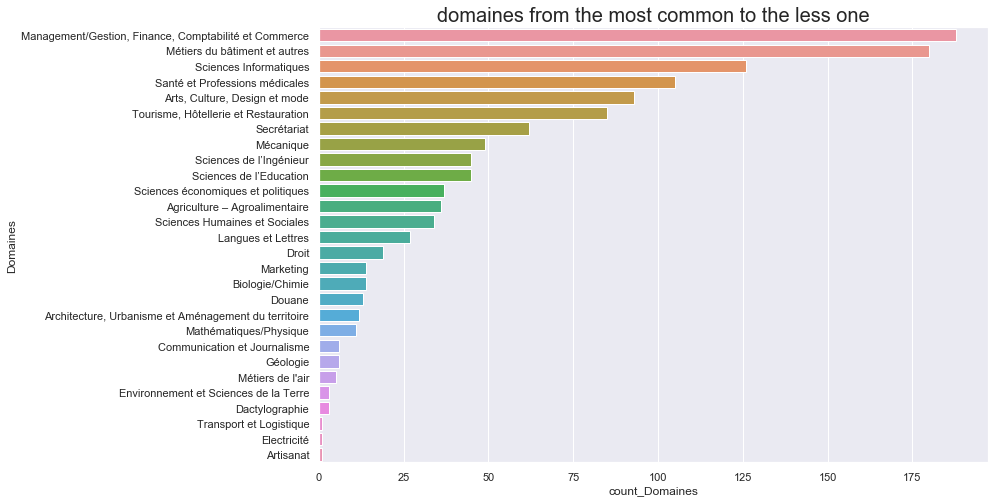

In [562]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
ax = sns.barplot(x="count_Domaines", y="Domaines", data=domaine)
ax.set_title('domaines from the most common to the less one',fontsize=20)

In [418]:
specialite = table7['Specialites'].value_counts().to_frame().reset_index()
specialite.rename(columns ={'index':"Specialites",'Specialites':"count_Specialites"},inplace = True)
specialite

,Specialites,count_Specialites
0,Comptabilité,76
1,Sciences Infirmières,62
2,Technique Informatique,62
3,Management/Gestion,59
4,Secrétariat,49
5,Electricité,36
6,Construction Bâtiment,33
7,Cuisine,31
8,Plomberie,30
9,Patisserie,28


In [567]:
top_specialites = specialite.iloc[0:20]
top_specialites

,Specialites,count_Specialites
0,Comptabilité,76
1,Sciences Infirmières,62
2,Technique Informatique,62
3,Management/Gestion,59
4,Secrétariat,49
5,Electricité,36
6,Construction Bâtiment,33
7,Cuisine,31
8,Plomberie,30
9,Patisserie,28


Text(0.5, 1.0, 'Top 20 Specialites from the most common to the less one')

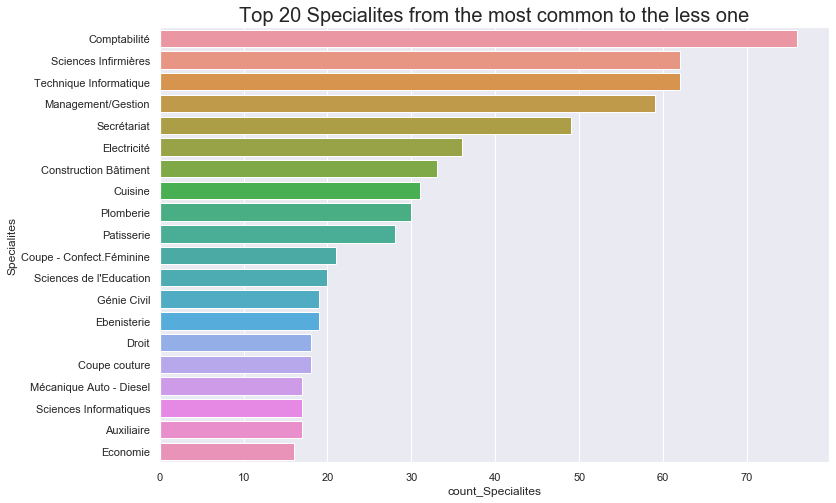

In [570]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
ax = sns.barplot(x="count_Specialites", y="Specialites", data=top_specialites)
ax.set_title('Top 20 Specialites from the most common to the less one',fontsize=20)

In [419]:
Type_Diplome = table7['Type_Diplomes'].value_counts().to_frame().reset_index()
Type_Diplome.rename(columns ={'index':"Type_Diplomes",'Type_Diplomes':"count_TypeD"},inplace = True)
Type_Diplome

,Type_Diplomes,count_TypeD
0,Technique,506
1,Licence,326
2,Diplome,240
3,Certificat,136
4,Master 1,13


Text(0.5, 1.0, 'Type_Diplomes from the most common to the less one')

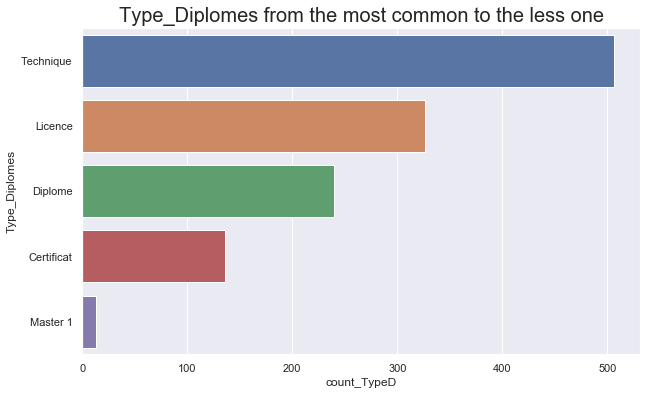

In [564]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
ax = sns.barplot(x="count_TypeD", y="Type_Diplomes", data=Type_Diplome)
ax.set_title('Type_Diplomes from the most common to the less one',fontsize=20)

In [600]:
result = table7.groupby(['communes'],sort=True)['Domaines'].value_counts().to_frame().rename(columns ={'Domaines':"count_Domaines"})
result

count_Domaines
communes               Domaines                                                          
Aquin                  Tourisme, Hôtellerie et Restauration                             2
                       Arts, Culture, Design et mode                                    1
Cabaret                Management/Gestion, Finance, Comptabilité et Co...               1
Cap-Haitien            Management/Gestion, Finance, Comptabilité et Co...              14
                       Santé et Professions médicales                                  12
                       Langues et Lettres                                               7
                       Sciences de l’Education                                          7
                       Secrétariat                                                      7
                       Sciences Humaines et Sociales                                    5
                       Tourisme, Hôtellerie et Restauration                             5
                       Sciences Informatiques                                           4
                       Arts, Culture, Design et mode                                    3
                       Droit                                                            3
                       Métiers du bâtiment et autres                                    3
                       Biologie/Chimie                                                  2
                       Mécanique                                                        2
                       Sciences économiques et politiques                               2
                       Agriculture – Agroalimentaire                                    1
                       Communication et Journalisme                                     1
                       Douane                                                           1
                       Marketing                                                        1
                       Mathématiques/Physique                                           1
                       Métiers de l'air                                                 1
Caracol                Management/Gestion, Finance, Comptabilité et Co...               1
Carice                 Tourisme, Hôtellerie et Restauration                             3
                       Arts, Culture, Design et mode                                    1
Carrefour              Management/Gestion, Finance, Comptabilité et Co...               8
                       Santé et Professions médicales                                   4
                       Sciences économiques et politiques                               4
                       Arts, Culture, Design et mode                                    3
                       Métiers du bâtiment et autres                                    3
                       Sciences Informatiques                                           3
                       Secrétariat                                                      3
                       Langues et Lettres                                               2
                       Sciences Humaines et Sociales                                    2
                       Sciences de l’Ingénieur                                          2
                       Biologie/Chimie                                                  1
                       Marketing                                                        1
                       Mathématiques/Physique                                           1
                       Sciences de l’Education                                          1
Carrefour-Feuilles     Santé et Professions médicales                                   2
Cayes                  Sciences Informatiques                                          15
                       Management/Gestion, Finance, Comptabilité et Co...              10
                       Mé

In [601]:
result1 = table7.groupby(['communes'],sort=True)['Specialites'].value_counts().to_frame().rename(columns ={'Specialites':"count_Specialites"})
result1

count_Specialites
communes               Specialites                                              
Aquin                  Coupe couture                                           1
                       Cuisine                                                 1
                       Patisserie                                              1
Cabaret                Management/Gestion                                      1
Cap-Haitien            Sciences Infirmières                                    9
                       Management/Gestion                                      5
                       Secrétariat                                             5
                       Comptabilité                                            4
                       Droit                                                   3
                       Enseignement prescolaire et primaire                    3
                       Français Langue étrangère (FLE)                         3
                       Technique Informatique                                  3
                       Théologie                                               3
                       Assistante Administrative                               2
                       Auxiliaire                                              2
                       Construction Bâtiment                                   2
                       Finance et Banque                                       2
                       Hôtellerie                                              2
                       Linguistique                                            2
                       Mécanique Ajustage                                      2
                       Sciences Expérimentales                                 2
                       Sciences de l'Education                                 2
                       Agronomie                                               1
                       Anglais                                                 1
                       Arts du Spectacle                                       1
                       Arts plastiques                                         1
                       Communication                                           1
                       Cuisine                                                 1
                       Economie                                                1
                       Education Familiale et Sexologie                        1
                       Electrotechnique/Electromecanique                       1
                       Entrepreneuriat                                         1
                       Espagnol                                                1
                       Gestion de Projets                                      1
                       Maths/Physique                                          1
                       Musicologie                                             1
                       Psychologie                                             1
                       Pédagogie                                               1
                       Relations Internationales                               1
                       Relations publiques                                     1
                       Restauration                                            1
                       Réseau                                                  1
                       Sciences du Développement                               1
                       Techniques Bancaires                                    1
                       Techniques Douanières                                   1
                       Ticketing                                               1
                       Tourisme                                                1
                       Vétérinaire                                             1
Caracol      

In [592]:
result2 = table7.groupby(['communes'],sort=True)['Type_Diplomes'].value_counts().to_frame().rename(columns ={'Type_Diplomes':"Type_Diplomes"})
result2

Type_Diplomes
communes               Type_Diplomes               
Aquin                  Technique                  3
Cabaret                Licence                    1
Cap-Haitien            Technique                 33
                       Diplome                   20
                       Licence                   20
                       Certificat                 8
                       Master 1                   1
Caracol                Diplome                    1
Carice                 Diplome                    4
Carrefour              Technique                 15
                       Licence                   14
                       Diplome                    7
                       Certificat                 2
Carrefour-Feuilles     Diplome                    2
Cayes                  Technique                 40
                       Diplome                    9
                       Licence                    8
                       Certificat                 1
                       Master 1                   1
Centre                 Technique                  3
Charpentier            Diplome                    1
Cite Soleil            Licence                    9
                       Technique                  3
Croix-des-Bouquets     Certificat                11
Delmas                 Licence                   35
                       Diplome                   28
                       Certificat                15
                       Technique                 15
Dondon                 Diplome                    1
Ennery                 Technique                  3
Fond-des-Negres        Licence                   11
                       Technique                  4
                       Certificat                 2
                       Diplome                    1
Gonaives               Technique                 20
                       Licence                   11
                       Diplome                    4
Grande-riviere du Nord Diplome                    4
                       Technique                  3
Gressier               Licence                    9
                       Technique                  3
Gros morne             Diplome                    1
Hinche                 Diplome                   10
                       Licence                    4
                       Master 1                   3
                       Technique                  2
                       Certificat                 1
Jacmel                 Licence                   26
                       Technique                  8
                       Certificat                 4
                       Diplome                    4
                       Master 1                   1
Jeremie                Diplome                   14
                       Certificat                12
                       Technique                  9
                       Licence                    6
LA Gonave              Licence                    9
                       Diplome                    1
Leogane                Technique                  4
                       Diplome                    2
Limbe                  Technique                  5
Maissade               Technique                  7
Mirebalais             Technique                  5
                       Licence                    4
                       Certificat                 2
                       Master 1                   1
Petion-Ville           Licence                    9
                       Diplome                    7
                       Certificat                 1
                       Technique                  1
Petit-Anse             Licence                   19
                       Diplome                    1
Petit-Goave            Licence                   12
                       Diplome                    7
                       Technique                  4
                       Certificat 

In [507]:
type1 = table7[table7['Type_Diplomes']=='Technique']
type2 = table7[table7['Type_Diplomes']=='Certificat']
type3 = table7[table7['Type_Diplomes']=='Diplome']
type4 = table7[table7['Type_Diplomes']=='Licence']
type5 = table7[table7['Type_Diplomes']=='Master 1']

In [509]:
type1.head()

,id_,institutions,communes,locations,Specialites,Domaines,Durees,Type_Diplomes,Diplomes
38,4,Abeille Ecole Ménagère,Port-au-Prince,"(18.547327, -72.3395928)",Coupe - Confect.Féminine,"Arts, Culture, Design et mode",2,Technique,5
39,4,Abeille Ecole Ménagère,Port-au-Prince,"(18.547327, -72.3395928)",Cuisine,"Tourisme, Hôtellerie et Restauration",2,Technique,10
40,4,Abeille Ecole Ménagère,Port-au-Prince,"(18.547327, -72.3395928)",Patisserie,"Tourisme, Hôtellerie et Restauration",2,Technique,20
43,6,Apex Centre de Formation Professionnelle,Petit-Goave,"(18.4326935, -72.865384)",Mécanique Auto - Diesel,Mécanique,2,Technique,9
45,6,Apex Centre de Formation Professionnelle,Petit-Goave,"(18.4326935, -72.865384)",Réfrigération,Métiers du bâtiment et autres,1,Technique,7


In [521]:
res = type1.groupby(['communes'],sort= True)['Type_Diplomes'].value_counts().to_frame().rename(columns ={'Type_Diplomes':"count_TypeD"}).reset_index()
res

,communes,Type_Diplomes,count_TypeD
0,Aquin,Technique,3
1,Cap-Haitien,Technique,33
2,Carrefour,Technique,15
3,Cayes,Technique,40
4,Centre,Technique,3
5,Cite Soleil,Technique,3
6,Delmas,Technique,15
7,Ennery,Technique,3
8,Fond-des-Negres,Technique,4
9,Gonaives,Technique,20


Text(0.5, 1.0, 'Technique by Commune')

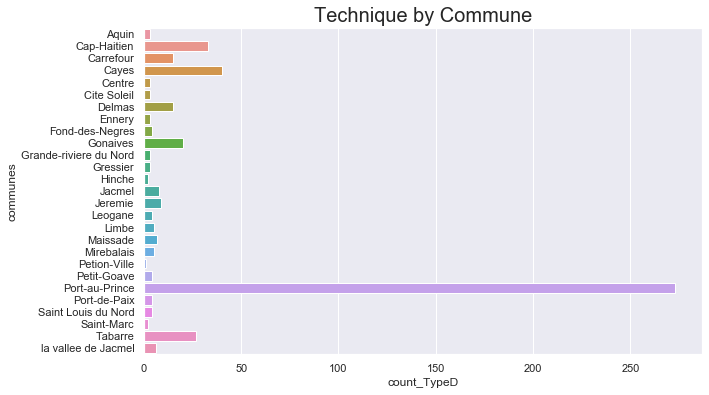

In [670]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
ax = sns.barplot(x="count_TypeD", y="communes", data=res)
ax.set_title('Technique by Commune',fontsize=20)

In [634]:
from geopy.geocoders import Nominatim
communes,latitude,longitude = [], [],[]
for name,adr in zip(res.communes,res.communes):
    geolocator = Nominatim(user_agent="location")
    location = geolocator.geocode(adr)
    if location:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
        communes.append(name)

In [635]:
val =dict(communes=communes,latitude=latitude, longitude=longitude)

In [636]:
df_loc = pd.DataFrame(val)

In [637]:
df_res = pd.merge(res,df_loc, on='communes',how='left', sort= True)

In [638]:
df_res.head()

,communes,Type_Diplomes,count_TypeD,latitude,longitude
0,Aquin,Technique,3,18.280901,-73.394446
1,Cap-Haitien,Technique,33,19.759524,-72.200807
2,Carrefour,Technique,15,-6.165539,106.819387
3,Cayes,Technique,40,-0.254509,-78.560815
4,Centre,Technique,3,47.549025,1.732406


In [520]:
res1 = type2.groupby(['communes'],sort= True)['Type_Diplomes'].value_counts().to_frame().rename(columns ={'Type_Diplomes':"count_TypeD"}).reset_index()
res1

,communes,Type_Diplomes,count_TypeD
0,Cap-Haitien,Certificat,8
1,Carrefour,Certificat,2
2,Cayes,Certificat,1
3,Croix-des-Bouquets,Certificat,11
4,Delmas,Certificat,15
5,Fond-des-Negres,Certificat,2
6,Hinche,Certificat,1
7,Jacmel,Certificat,4
8,Jeremie,Certificat,12
9,Mirebalais,Certificat,2


Text(0.5, 1.0, 'Certificat by Commune')

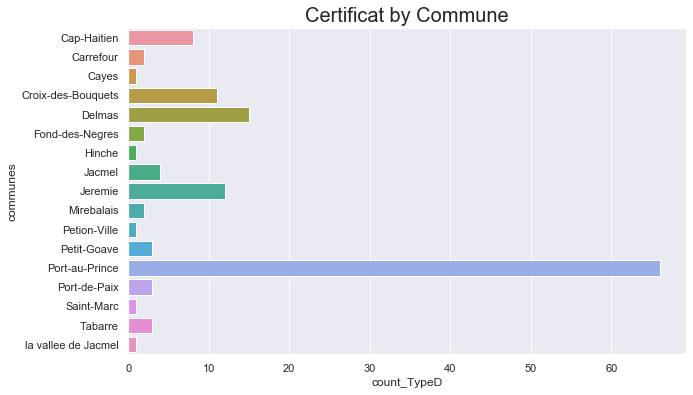

In [671]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
ax = sns.barplot(x="count_TypeD", y="communes", data=res1)
ax.set_title('Certificat by Commune',fontsize=20)

In [654]:
from geopy.geocoders import Nominatim
communes,latitude,longitude = [], [],[]
for name,adr in zip(res1.communes,res.communes):
    geolocator = Nominatim(user_agent="location")
    location = geolocator.geocode(adr)
    if location:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
        communes.append(name)

In [655]:
val1 =dict(communes=communes,latitude=latitude, longitude=longitude)

In [656]:
df_loc1 = pd.DataFrame(val1)

In [657]:
df_res1 = pd.merge(res1,df_loc1, on='communes',how='left', sort= True)

In [658]:
df_res1.head()

,communes,Type_Diplomes,count_TypeD,latitude,longitude
0,Cap-Haitien,Certificat,8,18.280901,-73.394446
1,Carrefour,Certificat,2,19.759524,-72.200807
2,Cayes,Certificat,1,-6.165539,106.819387
3,Croix-des-Bouquets,Certificat,11,-0.254509,-78.560815
4,Delmas,Certificat,15,47.549025,1.732406


In [519]:
res2 = type3.groupby(['communes'],sort= True)['Type_Diplomes'].value_counts().to_frame().rename(columns ={'Type_Diplomes':"count_TypeD"}).reset_index()
res2

,communes,Type_Diplomes,count_TypeD
0,Cap-Haitien,Diplome,20
1,Caracol,Diplome,1
2,Carice,Diplome,4
3,Carrefour,Diplome,7
4,Carrefour-Feuilles,Diplome,2
5,Cayes,Diplome,9
6,Charpentier,Diplome,1
7,Delmas,Diplome,28
8,Dondon,Diplome,1
9,Fond-des-Negres,Diplome,1


Text(0.5, 1.0, 'Diplome by Commune')

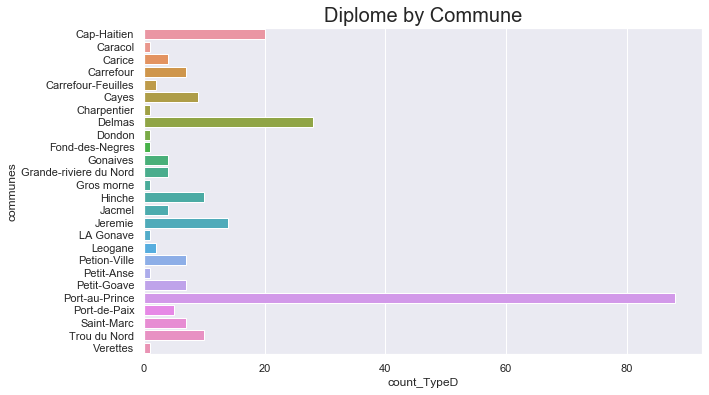

In [672]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
ax = sns.barplot(x="count_TypeD", y="communes", data=res2)
ax.set_title('Diplome by Commune',fontsize=20)

In [649]:
from geopy.geocoders import Nominatim
communes,latitude,longitude = [],[],[]
for name,adr in zip(res2.communes,res.communes):
    geolocator = Nominatim(user_agent="location")
    location = geolocator.geocode(adr)
    if location:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
        communes.append(name)

In [650]:
val2 =dict(communes=communes,latitude=latitude, longitude=longitude)

In [651]:
df_loc2 = pd.DataFrame(val2)

In [652]:
df_res2 = pd.merge(res2,df_loc2, on='communes',how='left', sort= True)

In [653]:
df_res2.head()

,communes,Type_Diplomes,count_TypeD,latitude,longitude
0,Cap-Haitien,Diplome,20,18.280901,-73.394446
1,Caracol,Diplome,1,19.759524,-72.200807
2,Carice,Diplome,4,-6.165539,106.819387
3,Carrefour,Diplome,7,-0.254509,-78.560815
4,Carrefour-Feuilles,Diplome,2,47.549025,1.732406


In [518]:
res3 = type4.groupby(['communes'],sort= True)['Type_Diplomes'].value_counts().to_frame().rename(columns ={'Type_Diplomes':"count_TypeD"}).reset_index()
res3

,communes,Type_Diplomes,count_TypeD
0,Cabaret,Licence,1
1,Cap-Haitien,Licence,20
2,Carrefour,Licence,14
3,Cayes,Licence,8
4,Cite Soleil,Licence,9
5,Delmas,Licence,35
6,Fond-des-Negres,Licence,11
7,Gonaives,Licence,11
8,Gressier,Licence,9
9,Hinche,Licence,4


Text(0.5, 1.0, 'License by Commune')

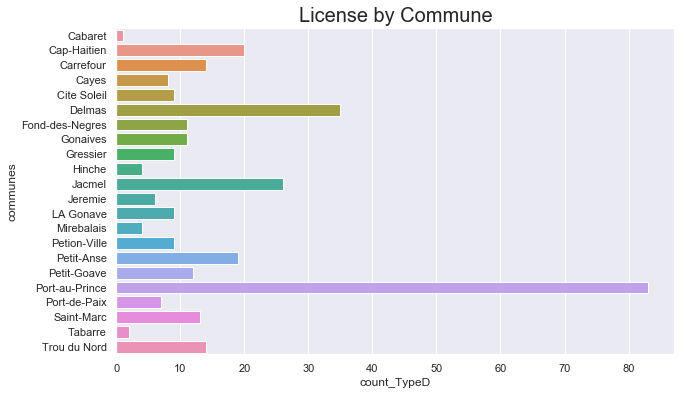

In [673]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
ax = sns.barplot(x="count_TypeD", y="communes", data=res3)
ax.set_title('License by Commune',fontsize=20)

In [644]:
from geopy.geocoders import Nominatim
communes,latitude,longitude = [],[],[]
for name,adr in zip(res3.communes,res.communes):
    geolocator = Nominatim(user_agent="location")
    location = geolocator.geocode(adr)
    if location:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
        communes.append(name)

In [645]:
val3 =dict(communes=communes,latitude=latitude, longitude=longitude)

In [646]:
df_loc3 = pd.DataFrame(val3)

In [647]:
df_res3 = pd.merge(res3,df_loc3, on='communes',how='left', sort= True)

In [648]:
df_res3.head()

,communes,Type_Diplomes,count_TypeD,latitude,longitude
0,Cabaret,Licence,1,18.280901,-73.394446
1,Cap-Haitien,Licence,20,19.759524,-72.200807
2,Carrefour,Licence,14,-6.165539,106.819387
3,Cayes,Licence,8,-0.254509,-78.560815
4,Cite Soleil,Licence,9,47.549025,1.732406


In [517]:
res4 = type5.groupby(['communes'],sort= True)['Type_Diplomes'].value_counts().to_frame().rename(columns ={'Type_Diplomes':"count_TypeD"}).reset_index()
res4

,communes,Type_Diplomes,count_TypeD
0,Cap-Haitien,Master 1,1
1,Cayes,Master 1,1
2,Hinche,Master 1,3
3,Jacmel,Master 1,1
4,Mirebalais,Master 1,1
5,Port-au-Prince,Master 1,3
6,Tabarre,Master 1,3


Text(0.5, 1.0, 'Master 1 by Commune')

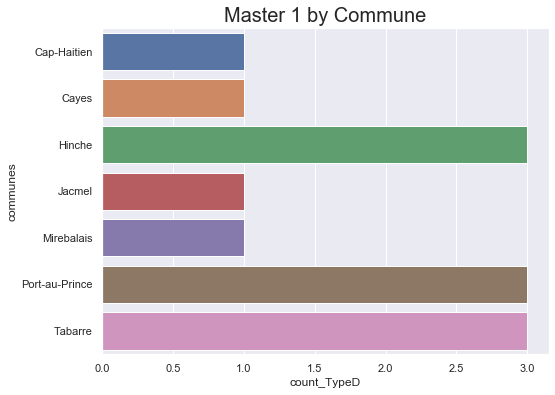

In [674]:
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
ax = sns.barplot(x="count_TypeD", y="communes", data=res4)
ax.set_title('Master 1 by Commune',fontsize=20)

In [675]:
from geopy.geocoders import Nominatim
communes,latitude,longitude = [],[],[]
for name,adr in zip(res4.communes,res.communes):
    geolocator = Nominatim(user_agent="location")
    location = geolocator.geocode(adr)
    if location:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
        communes.append(name)

In [640]:
val4 =dict(communes=communes,latitude=latitude, longitude=longitude)

In [641]:
df_loc4 = pd.DataFrame(val4)

In [642]:
df_res4 = pd.merge(res4,df_loc4, on='communes',how='left', sort= True)

In [643]:
df_res4.head()

,communes,Type_Diplomes,count_TypeD,latitude,longitude
0,Cap-Haitien,Master 1,1,18.280901,-73.394446
1,Cayes,Master 1,1,19.759524,-72.200807
2,Hinche,Master 1,3,-6.165539,106.819387
3,Jacmel,Master 1,1,-0.254509,-78.560815
4,Mirebalais,Master 1,1,47.549025,1.732406


In [631]:
from sklearn.cluster import KMeans
import folium

In [669]:
haiti_map = folium.Map(location=[18.971187, -72.285215], zoom_start=7)

for name,Type_Diplomes, latitude,longitude in zip(df_res['communes'],df_res['Type_Diplomes'], df_res['latitude'],df_res['longitude']):
    label = '{}','{}'.format(name,Type_Diplomes)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color="black",
        fill_opacity=0.7,
        parse_html=False).add_to(haiti_map)
    
for name,Type_Diplomes, latitude,longitude in zip(df_res1['communes'],df_res1['Type_Diplomes'], df_res1['latitude'],df_res1['longitude']):
    label = '{}','{}'.format(name,Type_Diplomes)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color="red",
        fill_opacity=0.7,
        parse_html=False).add_to(haiti_map)
    
for name,Type_Diplomes, latitude,longitude in zip(df_res2['communes'],df_res2['Type_Diplomes'], df_res2['latitude'],df_res2['longitude']):
    label = '{}','{}'.format(name,Type_Diplomes)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=4,
        popup=label,
        color='green',
        fill=True,
        fill_color="black",
        fill_opacity=0.7,
        parse_html=False).add_to(haiti_map)

for name,Type_Diplomes, latitude,longitude in zip(df_res3['communes'],df_res3['Type_Diplomes'], df_res3['latitude'],df_res3['longitude']):
    label = '{}','{}'.format(name,Type_Diplomes)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=4,
        popup=label,
        color='purple',
        fill=True,
        fill_color="black",
        fill_opacity=0.7,
        parse_html=False).add_to(haiti_map)
    
for name,Type_Diplomes, latitude,longitude in zip(df_res4['communes'],df_res4['Type_Diplomes'], df_res4['latitude'],df_res4['longitude']):
    label = '{}','{}'.format(name,Type_Diplomes)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=4,
        popup=label,
        color='yellow',
        fill=True,
        fill_color="black",
        fill_opacity=0.7,
        parse_html=False).add_to(haiti_map)
    
    
haiti_map